In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [6]:
class Diffdebugtest(spatialpy.Model):

    def __init__(self, model_name="diffusion_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.01

        A = spatialpy.Species(name="A", diffusion_constant=D_const)
        self.add_species([A])

        self.mesh = spatialpy.Mesh.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1.0, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 1000, [0,0,0]))

        self.timestep_size=0.1
        self.num_timesteps=10
        self.output_freq=1

In [7]:
model = Diffdebugtest()

totalvolume 4


In [8]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
sol.compile()
%time result = sol.run()

CPU times: user 0 ns, sys: 3.97 ms, total: 3.97 ms
Wall time: 1.27 s


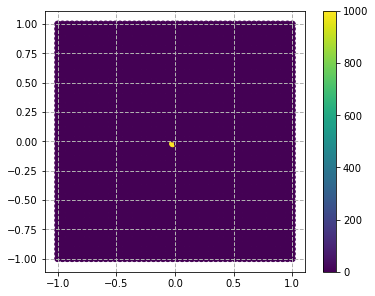

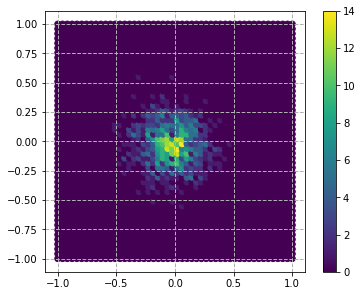

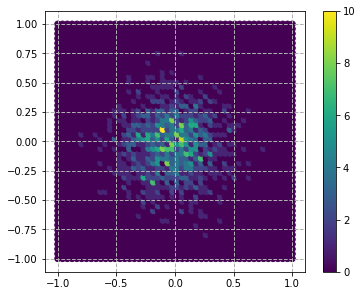

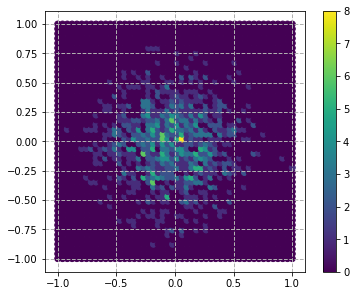

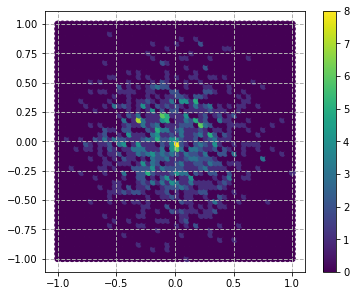

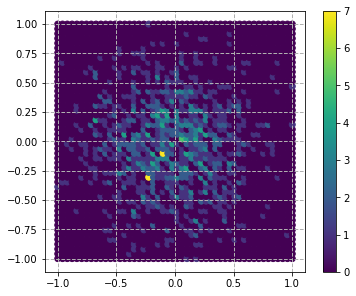

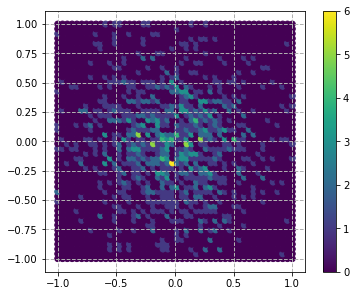

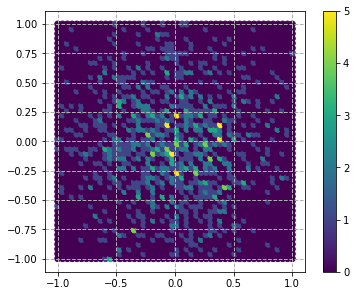

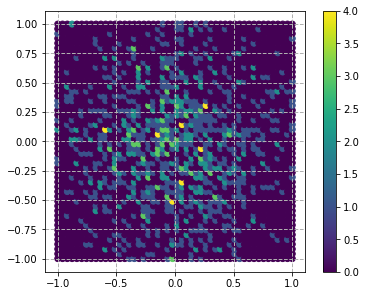

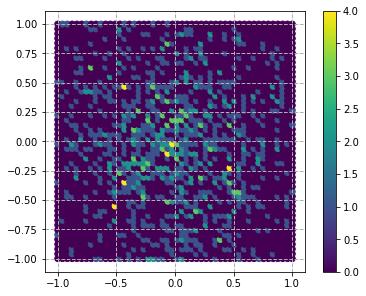

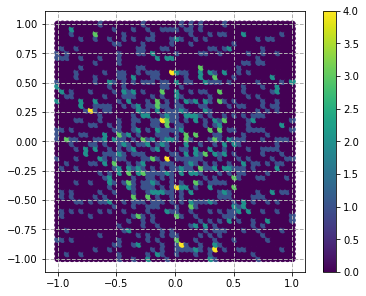

In [9]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("A", i, use_matplotlib=True, debug=False)